## Sentiment Analysis on News Articles - During Covid period

In [216]:
from transformers import pipeline
import matplotlib.pyplot as plt
import pandas as pd
import re
import itertools


sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some layers from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english were not used when initializing TFDistilBertForSequenceClassification: ['dropout_19']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceCla

In [331]:
data = pd.read_excel("News_2021_1350849078.xlsx")

In [363]:
## replace nan with empty string
data["content"] = data["content"].astype(str)
data["description"] = data["description"].astype(str)

data.loc[data['content'] == 'nan','content'] = ''
data.loc[data['description'] == 'nan','description'] = ''

In [364]:
data["finalText"]  = data["content"] + data["description"]

In [365]:
data["finalText"]

0      Covid news - live: PM insists booster jabs wil...
1      Kolkata Municipal Corporation all set to reope...
2      Leaked memo hints 'immediate' roll-out of Covi...
3      Guwahati: Assam CM Himanta Biswa Sarma recentl...
4      Kamal Baruah(The writer can be reached at kama...
                             ...                        
764    There has been a 20-fold increase in the numbe...
765    What if workers had the ‚Äúright to disconnect...
766    Some students and teachers in California on Mo...
767    MIRABEL, Quebec, Oct. 26, 2021 (GLOBE NEWSWIRE...
768    Guwahati: The leaders of the All Assam Minorit...
Name: finalText, Length: 769, dtype: object

In [366]:
k = data["description"].astype("str")[0]
re.sub('[Äô¬†¬†ò,]', '', k)

"Covid news - live: PM insists booster jabs will ‚protect Christmas‚ as NHS faces ‚worst winter ever‚The IndependentUK government paves way to bring in tough ‚plan B‚ Covid rulesThe GuardianGet the booster jab to save Christmas Britons urged as country faces Covid 'crunch point'Telegraph.co.ukThe Observer view on the winter crisis facing the NHSThe GuardianCOVID-19: Boris Johnson urges those eligible to get coronavirus booster jabs this winterSky NewsView Full coverage on Google News"

In [367]:
### read the stopwords
stopWordsList = pd.read_table('file.txt',header=None)[0].to_list()

In [397]:
def toList(val,stopWordsList):
    val = re.sub('[Äô¬†¬†òú.:\']', '', val)
    val = val.lower().split(" ")
    
    ## remove all the stopwords 
    filteredWords = [word for word in val if (word not in stopWordsList) and (len(word) > 1)]
    return filteredWords

In [398]:
data["ListWords"] = data["finalText"].apply(lambda x: toList(x,stopWordsList))

In [399]:
## Identify the covid news
def checkCOVID(val):
    covidWords = ["covid", "coronavirus", "vaccine", "vaccination", "antibody", "moderna", "pfizer", "johnson","covid-19"]
    
    for w in val:
        if w in covidWords or 'covid' in w:
            return 1
    return 0

In [400]:
data["Covid"] = data["ListWords"].apply(lambda x: checkCOVID(x))

## Q1 : Total Words

In [401]:
TotalWordList = data["ListWords"].to_list()

In [402]:
TotalWordList = list(itertools.chain.from_iterable(TotalWordList))

Q1 : Top occuring 20 words 
------------------------------- 

covid-19       781
new            532
said           495
news           467
covid          384
vaccine        307
people         297
health         284
google         283
cases          281
coverage       274
‚ì             200
says           192
government     165
year           154
time           152
live           151
pandemic       149
vaccination    145
just           131
dtype: int64


Text(0.5, 1.0, 'Top Occuring 20 Words')

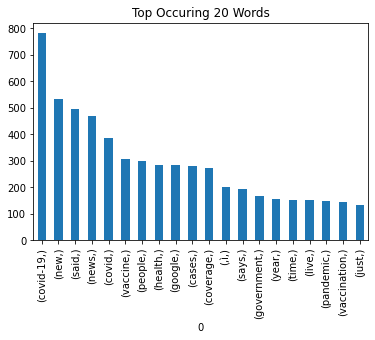

In [403]:
df = pd.DataFrame(TotalWordList)
ax = df.value_counts()[:20].plot(kind='bar')

print("Q1 : Top occuring 20 words ")
print("------------------------------- \n")
print(df.value_counts()[:20])

ax.set_title("Top Occuring 20 Words")
# labels = list(df.value_counts()[:20].keys().get_level_values(0))
# ax.set_xticks(labels,labels)

## Q2 : Covid percentage

Q2 :  Number of covid Cases :
-----------------------------

# Total Cases           :  769
# Total Covid Cases     :  708
# Total Covid Cases (%) :  92.068 %


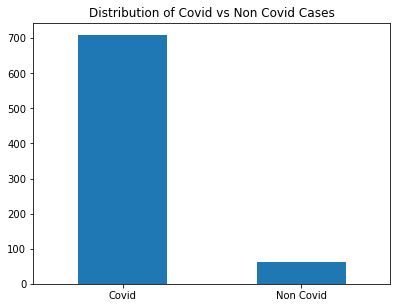

In [404]:
print("Q2 :  Number of covid Cases :")
print("-----------------------------\n")
print("# Total Cases           : " , data.shape[0])
print("# Total Covid Cases     : " ,data["Covid"].value_counts()[1] )
covidCase = (data["Covid"].value_counts()[1] / data.shape[0])*100
print(f'# Total Covid Cases (%) :  {covidCase:.3f} %'  )


fig,ax = plt.subplots(figsize=(6.4,4.8))
ax = data["Covid"].value_counts().plot(kind='bar')
ax.set_title("Distribution of Covid vs Non Covid Cases")
ax.set_xticks([0,1],['Covid','Non Covid'],rotation=0)


## Q3 : Sentiment for all articles not related to covid

In [405]:
def sentiment(val):
    val = " ".join(val)
    k = sentiment_pipeline(val[:500])
    return k[0]['label']

def sentimentPercentage(val):
    val = " ".join(val)
    k = sentiment_pipeline(val[:500])
    return k[0]['score']

In [406]:
scoreList = []
sentimentlist = []
for index, row in data.iterrows():
    rowVal = row["ListWords"]
    val = " ".join(rowVal)
    k = sentiment_pipeline(val[:400])
    sentimentlist.append(k[0]['label'])
    scoreList.append(k[0]['score'])

data["Sentiment"]  = sentimentlist
data["SentimentScore"] = scoreList

In [408]:
dataNonCovid = data[data["Covid"] == 0]

for index, row in dataNonCovid.iterrows():
    rowVal = " ".join(row["ListWords"])
    print('Article Text : ' , str(rowVal)[:40] , '...' , str(rowVal)[-20:])
    print('Sentiment    : ' , row['Sentiment'] , "Percentage : " , row['SentimentScore'])

Article Text :  vancouver ‚î british columbia set lift c ... ly 2020 wearing mask
Sentiment    :  NEGATIVE Percentage :  NEGATIVE
Article Text :  vancouver ‚î british columbia set lift c ... ly 2020 wearing mask
Sentiment    :  NEGATIVE Percentage :  NEGATIVE
Article Text :  vancouver ‚î british columbia set lift c ... ly 2020 wearing mask
Sentiment    :  NEGATIVE Percentage :  NEGATIVE
Article Text :  chancellor says data does currently sugg ... ately moving plan b"
Sentiment    :  POSITIVE Percentage :  POSITIVE
Article Text :  department health confirmed latest figur ... st figures afternoon
Sentiment    :  POSITIVE Percentage :  POSITIVE
Article Text :  programs like canada emergency wage subs ... nd replaced new ones
Sentiment    :  NEGATIVE Percentage :  NEGATIVE
Article Text :  programs like canada emergency wage subs ... nd replaced new ones
Sentiment    :  NEGATIVE Percentage :  NEGATIVE
Article Text :  south african medical association says b ... vailable immediately
Sentimen

## Q4 : Overall Sentiment

In [295]:


for index, row in data.iterrows():
    rowVal = " ".join(row["ListWords"])
    print('Article Text : ' , str(rowVal)[:40] , '...' , str(rowVal)[-20:])
    print('Sentiment    : ' , row['Sentiment'] , "Percentage : " , row['SentimentScore'])

Article Text :  covid news - live pm insists booster jab ... coverage google news
Sentiment    :  NEGATIVE Percentage :  NEGATIVE
Article Text :  kolkata municipal corporation set reopen ... id surge covid cases
Sentiment    :  NEGATIVE Percentage :  NEGATIVE
Article Text :  leaked memo hints immediate roll-out cov ... tionsderbyshire live
Sentiment    :  POSITIVE Percentage :  POSITIVE
Article Text :  guwahati assam cm himanta biswa sarma re ... dingapara tea estate
Sentiment    :  NEGATIVE Percentage :  NEGATIVE
Article Text :  kamal baruah(the writer reached kamalbar ... c early 20th century
Sentiment    :  NEGATIVE Percentage :  NEGATIVE
Article Text :  coronavirus live uk travel rules relaxed ... coverage google news
Sentiment    :  NEGATIVE Percentage :  NEGATIVE
Article Text :  victoria hit fully vaccinated targets mo ... coverage google news
Sentiment    :  NEGATIVE Percentage :  NEGATIVE
Article Text :  braves pennant win prompts gops brian ke ... coverage google news
Sentimen

In [389]:
from itertools import chain

TotalWordList_nonCovid = data[data["Covid"] ==0]["ListWords"].to_list()
# TotalWordList_nonCovid = data[data["Covid"] ==0]["ListWords"].to_list()
flatten_list = list(chain.from_iterable(TotalWordList_nonCovid))

In [390]:
# !pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [393]:
unique_string=(" ").join(flatten_list)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(unique_string)

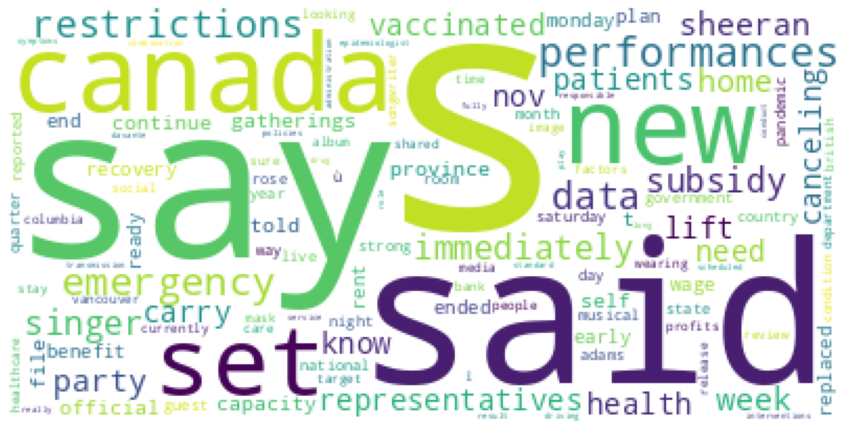

In [394]:
plt.figure(figsize=(15,8))
plt.imshow(word_cloud)
plt.axis("off")
# plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

## Word Cloud with all 

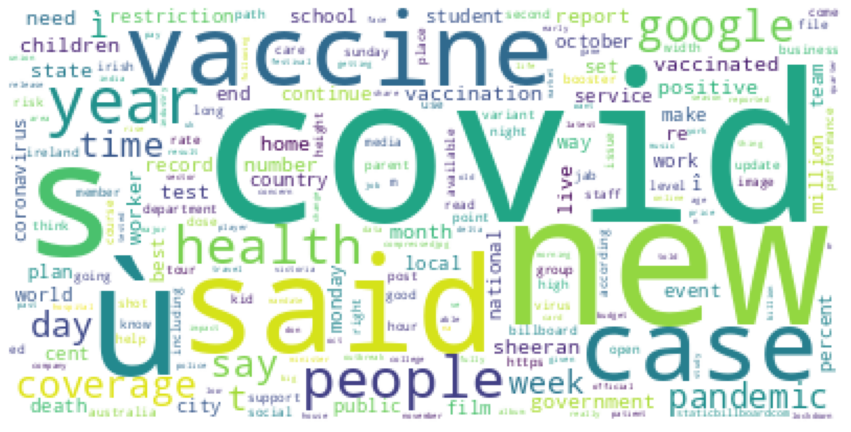

In [396]:
from itertools import chain

TotalWordList = data["ListWords"].to_list()
flatten_list = list(chain.from_iterable(TotalWordList))
unique_string=(" ").join(flatten_list)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(word_cloud)
plt.axis("off")
# plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

In [352]:
dd.value_counts()

said          25
new           24
home          17
canada        15
sheeran       15
              ..
angeles        1
ireland,       1
involving      1
investment     1
korea          1
Length: 1742, dtype: int64

In [410]:
data.columns.to_list()

['title',
 'link',
 'keywords',
 'creator',
 'video_url',
 'description',
 'content',
 'pubDate',
 'full_description',
 'image_url',
 'source_id',
 'finalText',
 'ListWords',
 'Covid',
 'Sentiment',
 'SentimentScore']

Text(0.5, 1.0, 'Sentiment on All')

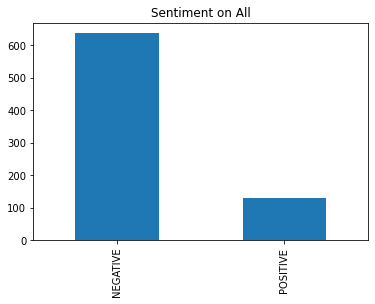

In [415]:
ax = data["Sentiment"].value_counts().plot(kind='bar')
ax.set_title("Sentiment on All")